In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten,Dropout

In [155]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,shear_range = 0.1,zoom_range = 0.1,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Train-Test Split  RUN ONLY ONCE
import splitfolders
splitfolders.ratio(r'D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset', output=r"D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset\brain_tumor_dataset_split", ratio=(0.8, 0.2))

Copying files: 253 files [00:00, 1155.90 files/s]


In [156]:
x_train = train_datagen.flow_from_directory(r'D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset\brain_tumor_dataset_split\train',target_size = (256,256),batch_size = 20,class_mode = "binary")
x_test = test_datagen.flow_from_directory(r'D:\AI Course\Final Project\Brain MRI\brain_tumor_dataset\brain_tumor_dataset_split\val',target_size = (256,256),batch_size = 20,class_mode = "binary")

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [157]:
x_train

In [158]:
x_train.class_indices

{'no': 0, 'yes': 1}

In [159]:
x_test.class_indices

{'no': 0, 'yes': 1}

In [160]:
len(x_test)

3

In [161]:
len(x_train)

11

In [186]:
model = Sequential()

In [187]:
model.add(Convolution2D(32,(3,3),input_shape = (256,256,3)))

In [188]:
model.add(MaxPooling2D((3,3)))

In [189]:
model.add(Dropout(0.2))

In [190]:
model.add(Flatten())

In [191]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [192]:
model.add(Dropout(0.25))

In [193]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [194]:
model.add(Dropout(0.1))

In [195]:
model.add(Dense(units = 1 , kernel_initializer= "random_uniform",activation = "sigmoid"))

In [196]:
model.compile(optimizer= "adam",loss = "binary_crossentropy" , metrics =["accuracy"])

In [197]:
model.fit(x_train,steps_per_epoch =8 , epochs = 32 , validation_data = x_test,validation_steps = 3 )

Epoch 1/32
8/8 [==============================] - 8s 890ms/step - loss: 1.3949 - accuracy: 0.6197 - val_loss: 0.6906 - val_accuracy: 0.6275
Epoch 2/32
8/8 [==============================] - 6s 739ms/step - loss: 0.7306 - accuracy: 0.6479 - val_loss: 0.5419 - val_accuracy: 0.8039
Epoch 3/32
8/8 [==============================] - 6s 759ms/step - loss: 0.6069 - accuracy: 0.7113 - val_loss: 0.5711 - val_accuracy: 0.6667
Epoch 4/32
8/8 [==============================] - 7s 928ms/step - loss: 0.5476 - accuracy: 0.7500 - val_loss: 0.5512 - val_accuracy: 0.7059
Epoch 5/32
8/8 [==============================] - 7s 855ms/step - loss: 0.5445 - accuracy: 0.7535 - val_loss: 0.5368 - val_accuracy: 0.7647
Epoch 6/32
8/8 [==============================] - 7s 870ms/step - loss: 0.4765 - accuracy: 0.7688 - val_loss: 0.5563 - val_accuracy: 0.7451
Epoch 7/32
8/8 [==============================] - 6s 704ms/step - loss: 0.4733 - accuracy: 0.7535 - val_loss: 0.5713 - val_accuracy: 0.7647
Epoch 8/32
8/8 [====

In [164]:
model.save("Brain_Tumor(90_84).h5")

###  Testing

In [198]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np

In [22]:
model = load_model (r"D:\AI Course\Final Project\Brain_Tumor5.h5")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-18349637a8c0>", line 1, in <module>
    model = load_model (r"D:\AI Course\Final Project\Brain_Tumor5.h5")
  File "C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\saving\save.py", line 201, in load_model
    return hdf5_format.load_model_from_hdf5(filepath, custom_objects,
  File "C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\saving\hdf5_format.py", line 214, in load_model_from_hdf5
    model.optimizer.set_weights(optimizer_weight_values)
  File "C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\adam.py", line 161, in set_weights
    super(Adam, self).set_weights(weights)
  File "C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python

TypeError: object of type 'NoneType' has no len()

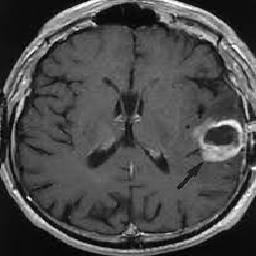

In [228]:
img = image.load_img(r"D:\AI Course\Final Project\BT_yes3.jfif",target_size = (256,256))
img

In [229]:
x = image.img_to_array(img)

In [230]:
x.shape

(256, 256, 3)

In [231]:
x = np.expand_dims(x,axis = 0)

In [232]:
pred = model.predict(x)

In [233]:
pred

array([[0.]], dtype=float32)

In [234]:
pred>0.5

array([[False]])

In [42]:
#D:\AI Course\Final Project\Brain MRI\no\No19.jpg  NO

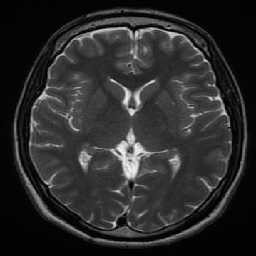

In [43]:
img2 = image.load_img(r"D:\AI Course\Final Project\Brain MRI\no\No22.jpg",target_size = (256,256))
img2

In [44]:
x2 = image.img_to_array(img2)

In [45]:
x2.shape

(256, 256, 3)

In [46]:
x2 = np.expand_dims(x2,axis = 0)

In [47]:
pred2 = model.predict(x2)

In [48]:
pred2

array([[0.]], dtype=float32)

In [49]:
pred2>0.5

array([[False]])

In [50]:
model.evaluate(x_train)

11/11 [==============================] - 3s 274ms/step - loss: 0.2458 - accuracy: 0.9208


[0.24575521051883698, 0.9207921028137207]

In [51]:
model.evaluate(x_test)

3/3 [==============================] - 0s 103ms/step - loss: 0.4642 - accuracy: 0.8235


[0.46416810154914856, 0.8235294222831726]

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               32514304  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6